In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("economic_index.csv")

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


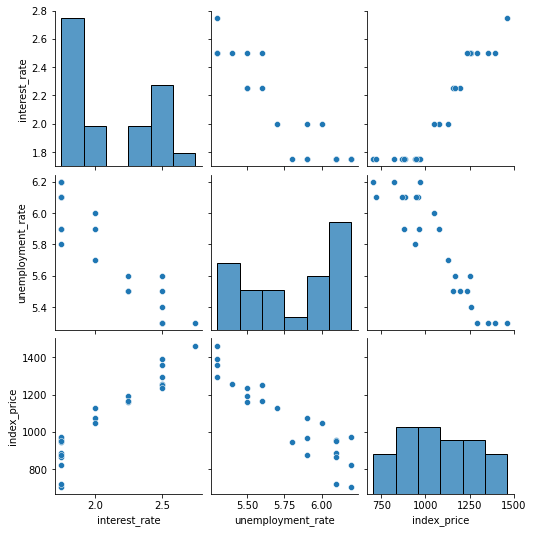

In [9]:
sns.pairplot(df)

Text(0, 0.5, 'Index Price')

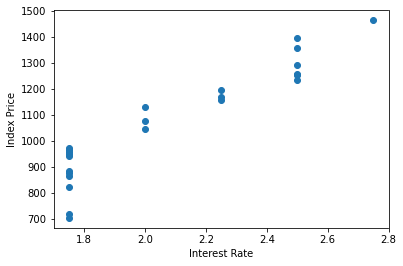

In [10]:
plt.scatter(df["interest_rate"],df["index_price"])
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

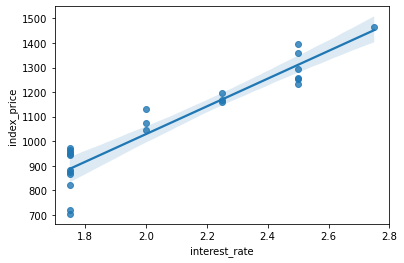

In [44]:
sns.regplot(df["interest_rate"],df["index_price"])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='unemployment_rate', ylabel='index_price'>

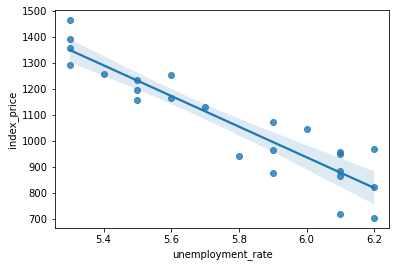

In [45]:
sns.regplot(df["unemployment_rate"],df["index_price"])

Text(0, 0.5, 'Index Price')

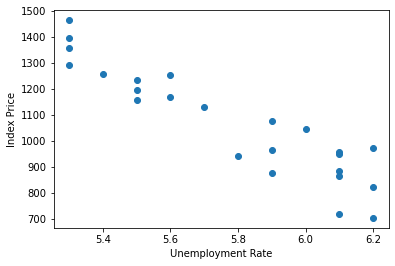

In [11]:
plt.scatter(df["unemployment_rate"],df["index_price"])
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")

In [12]:
#Independent and Dependent features

X=df.iloc[:,:-1]

y=df.iloc[:,-1]

In [15]:
# Train test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
X_train

,interest_rate,unemployment_rate
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2
17,1.75,6.1
20,1.75,5.9


In [30]:
from sklearn.preprocessing import StandardScaler
sec=StandardScaler()
X_train=sec.fit_transform(X_train)

In [31]:
X_test=sec.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)

In [35]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [36]:
lr.coef_

array([  96.28689501, -101.57024663])

In [37]:
lr.intercept_

1037.6875

In [40]:
X_train.shape

(16, 2)

In [41]:
y_train.shape

(16,)

In [42]:
y_pred=lr.predict(X_test)

In [43]:
y_pred

array([1192.13083729,  824.23971817, 1400.41971162,  856.16016713,
        992.22505325, 1160.21038833,  920.00106505, 1328.19572341])

In [ ]:
# Cross - validation score

In [46]:
from sklearn.model_selection import cross_val_score

vscore=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',
                                cv=3)

In [47]:
np.mean(vscore)

-7418.997871943823

In [48]:
vscore

array([ -2618.85404734,  -4597.45700504, -15040.68256345])

In [49]:
# Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5088.329958294002
58.95987629034907
71.3325308558024


In [50]:
score=r2_score(y_pred,y_test)
print(score)

0.8773740004475672


In [51]:
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.828323600626594


In [52]:
# Assumptions

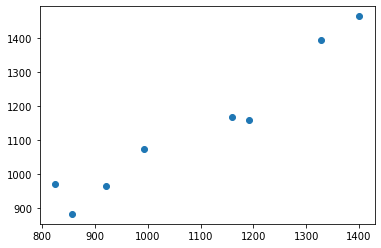

In [53]:
plt.scatter(y_pred,y_test)

In [54]:
residual=y_pred-y_test
print(residual)

8      33.130837
16   -146.760282
0     -63.580288
18    -27.839833
11    -82.774947
9      -6.789612
13    -44.998935
1     -65.804277
Name: index_price, dtype: float64


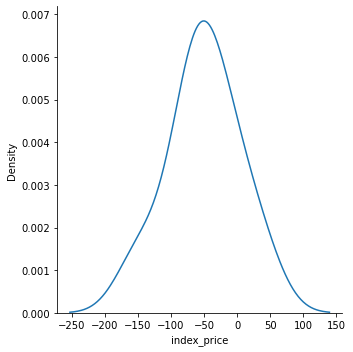

In [56]:
# Plot the residual

sns.displot(residual,kind="kde")

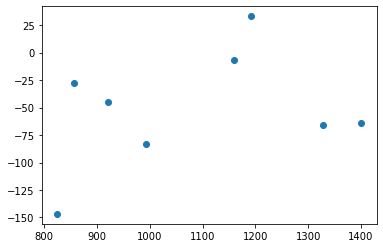

In [57]:
plt.scatter(y_pred,residual)

In [58]:
#OLS

In [59]:
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()

In [60]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.105
Method:                 Least Squares   F-statistic:                             0.2425
Date:                Tue, 20 Aug 2024   Prob (F-statistic):                       0.788
Time:                        15:39:57   Log-Likelihood:                         -133.85
No. Observations:                  16   AIC:                                      271.7
Df Residuals:                      14   BIC:                                      273.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)


In [61]:
prediction=model.predict(X_test)
print(prediction)

[ 154.44333729 -213.44778183  362.73221162 -181.52733287  -45.46244675
  122.52288833 -117.68643495  290.50822341]
